In [1]:
import numpy 
from matplotlib import pyplot, cm

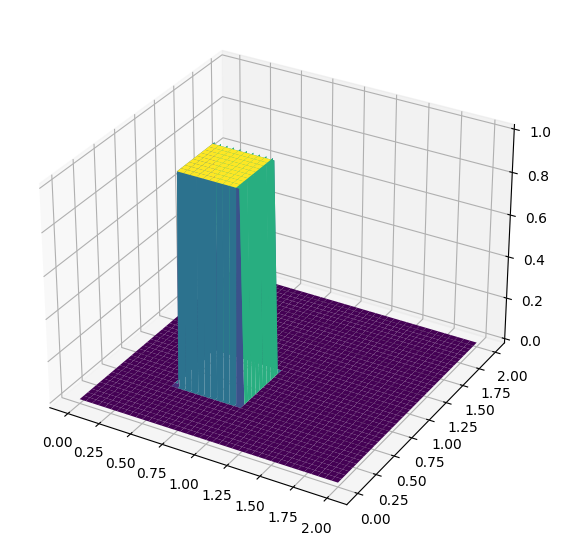

In [2]:
#Constant declaration

c = 1
nx = 81
ny = 81
dx = 2/(nx-1)
dy = 2/(ny-1)
nt = 100
sigma = .2
dt = sigma*dx

#Variable declaration
u = numpy.zeros([nx, ny])
v = numpy.zeros([nx, ny])

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

#Initial conditions
u[nx//4:nx//2, ny//4:ny//2] = 1

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [3]:
cdtbydx = c*dt/dx
cdtbydy = c*dt/dy
nt = 100
for n in range(nt):
    un = u.copy()
    for j in range(ny):
        for i in range(nx):
            u[i, j] = un[i, j] - cdtbydx * (un[i, j] - un[i - 1, j]) - cdtbydy * (un[i, j] - un[i, j - 1])

    # boundary conditions
    u[0, :] = 0
    u[-1, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0

    # plot and save image
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
    pyplot.savefig(f"images/image_{n:04d}.jpg")
    pyplot.close()
